In [2]:
### Basic Imports
import pandas as pd
import numpy as np

### Graphic libraries
import matplotlib.pyplot as plt
import seaborn as sns 


### Importing the relevant ML libraries 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,roc_curve,auc,recall_score,f1_score,precision_score,classification_report,confusion_matrix,auc

### Some cosmetics add-ons
plt.style.use('fivethirtyeight')
%matplotlib inline

# Loading dataset

In [5]:
df = pd.read_csv('annual_data/nba_season_2014_data.csv')
df.head()

,SEASON_ID_x,TEAM_ID_x,TEAM_ABBREVIATION_x,TEAM_NAME_x,GAME_ID,GAME_DATE_x,MATCHUP_x,WL_x,MIN_x,PTS_x,...,OFFRATE_y,DEFRATE_y,ELO_y,DIS_PTS_y,DIS_AST_y,DIS_OREB_y,DIS_DREB_y,DIS_OFFRATE_y,DIS_DEFRATE_y,DIS_ELO_y
0,22014,1610612747,LAL,Los Angeles Lakers,21400003,2014-10-28,LAL vs. HOU,0,240,90,...,0.0,0.0,1500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,22014,1610612740,NOP,New Orleans Pelicans,21400001,2014-10-28,NOP vs. ORL,1,240,101,...,0.0,0.0,1500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,22014,1610612742,DAL,Dallas Mavericks,21400002,2014-10-28,DAL @ SAS,0,239,100,...,0.0,0.0,1500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22014,1610612749,MIL,Milwaukee Bucks,21400004,2014-10-29,MIL @ CHA,0,264,106,...,0.0,0.0,1500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,22014,1610612744,GSW,Golden State Warriors,21400014,2014-10-29,GSW @ SAC,1,239,95,...,0.0,0.0,1500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df.info(verbose=True , null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 111 columns):
SEASON_ID_x            1230 non-null int64
TEAM_ID_x              1230 non-null int64
TEAM_ABBREVIATION_x    1230 non-null object
TEAM_NAME_x            1230 non-null object
GAME_ID                1230 non-null int64
GAME_DATE_x            1230 non-null object
MATCHUP_x              1230 non-null object
WL_x                   1230 non-null int64
MIN_x                  1230 non-null int64
PTS_x                  1230 non-null int64
FGM_x                  1230 non-null int64
FGA_x                  1230 non-null int64
FG_PCT_x               1230 non-null float64
FG3M_x                 1230 non-null int64
FG3A_x                 1230 non-null float64
FG3_PCT_x              1230 non-null float64
FTM_x                  1230 non-null int64
FTA_x                  1230 non-null int64
FT_PCT_x               1230 non-null float64
OREB_x                 1230 non-null float64
DREB_x            

# Creating our target and independent variables

In [35]:
features_list = ['DIS_ELO_x', 'HOME_COURT_x', 'DIS_OFFRATE_x', 'DIS_DEFRATE_x', 'DIS_PTS_x', 'DIS_AST_x', 'DIS_OREB_x', 'DIS_DREB_x']
target = 'WL_x'

# Plotting distribution graphs for all the variables

In [21]:
# Function to plot distribution graphs

def eda_plots(df,features_list,plot_title,fig_size):

    df[features_list].hist(bins=40,edgecolor='b',linewidth=1.0,xlabelsize=8,ylabelsize=8,grid= False,figsize=fig_size ,color='red')

    plt.tight_layout(rect=(0,0,1.2,1.2))

    # Overall title for all the plots
    plt.suptitle(plot_title,x=0.65,y=1.25,fontsize=14)

    plt.show()

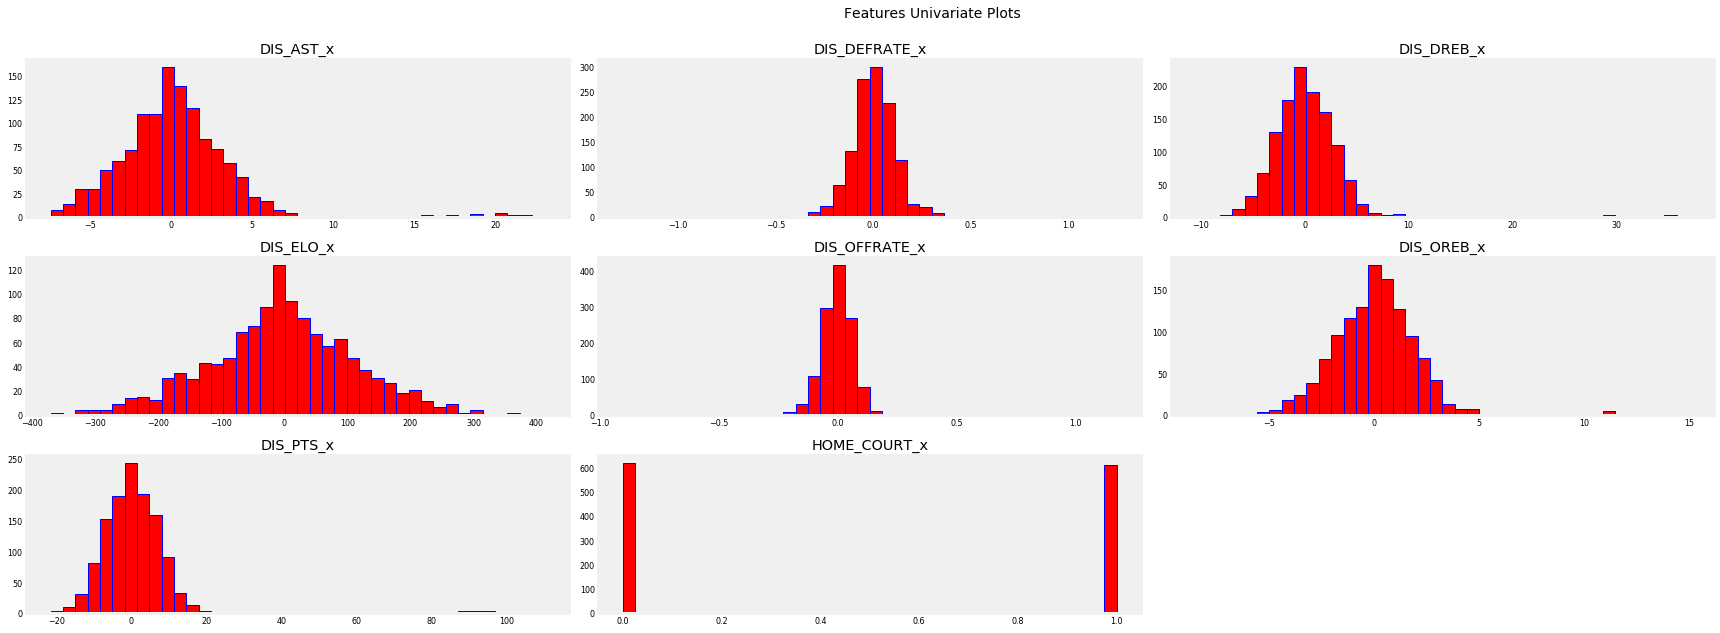

In [25]:
eda_plots(df,features_list,'Features Univariate Plots',(20,7))

All variables are relatively normally distributed. 

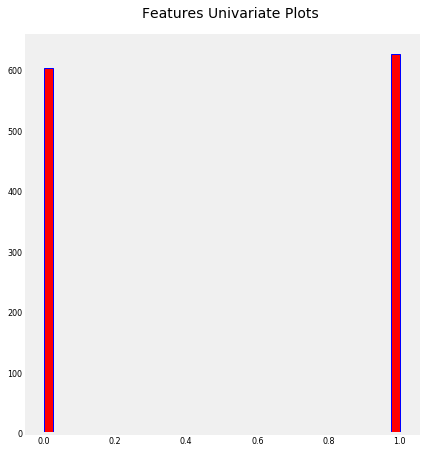

In [31]:
eda_plots(df,target,'Features Univariate Plots',(5,5))

Balanced target variable!

# Splitting dataset to train and test datasets

In [36]:
filtered_df = df[['DIS_ELO_x', 'HOME_COURT_x', 'DIS_OFFRATE_x', 'DIS_DEFRATE_x', 'DIS_PTS_x', 'DIS_AST_x', 'DIS_OREB_x', 'DIS_DREB_x']]
y = df['WL_x']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(filtered_df, y, test_size=0.3, random_state=15) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((861, 8), (369, 8), (861,), (369,))

# Modelling

In [39]:
models_dict = {
    'Logistic Regression':LogisticRegression(),
    'Naive Bayes':GaussianNB(),
    'Decision Trees':DecisionTreeClassifier(),
    'SVM linear': svm.SVC(kernel='linear'),
    'SVM rbf': svm.SVC(kernel='rbf'),
    'Random Forest': RandomForestClassifier()
}

performance_data = {
    'accuracy':[],
    'precision':[],
    'recall':[],
    'f1':[]
}

In [40]:
for model_name in models_dict:
    m = models_dict[model_name]
    
    m.fit(X_train, y_train)
    predictions = m.predict(X_test)

    acc = accuracy_score(y_test,predictions)  # always true label first, then your predicted labels!
    precision = precision_score(y_test,predictions) 
    recall = recall_score(y_test,predictions) 
    f1 = f1_score(y_test,predictions)

    # adding into the performance data dict
    performance_data['accuracy'].append(acc)
    performance_data['precision'].append(precision)
    performance_data['recall'].append(recall)
    performance_data['f1'].append(f1)

    print('Accuracy Score for {} is {:.5f}'.format(model_name,acc))

Accuracy Score for Logistic Regression is 0.67480
Accuracy Score for Naive Bayes is 0.67209
Accuracy Score for Decision Trees is 0.61247
Accuracy Score for SVM linear is 0.68564
Accuracy Score for SVM rbf is 0.60705
Accuracy Score for Random Forest is 0.59350


# Performance Analysis

In [41]:
performance_df = pd.DataFrame(performance_data,index=list(models_dict.keys()))
performance_df

,accuracy,precision,recall,f1
Logistic Regression,0.674797,0.682692,0.724490,0.702970
Naive Bayes,0.672087,0.658228,0.795918,0.720554
Decision Trees,0.612466,0.625592,0.673469,0.648649
SVM linear,0.685637,0.683486,0.760204,0.719807
SVM rbf,0.607046,0.617512,0.683673,0.648910
Random Forest,0.593496,0.627778,0.576531,0.601064


# Predict using every model

In [46]:
for model_name in models_dict:
    m = models_dict[model_name]
    prediction = m.predict(X_test)

    print('*'*60)
    print(f'Classification Report ({model_name}): \n')
    print(classification_report(y_test,prediction)) 

    print('-'*60)
    print('Confusion Matrix: \n')

    cm = confusion_matrix(y_test, prediction)
    cm_df = pd.DataFrame(cm,columns=[0,1],index=[0,1]) 
    # should it be columns=[1,0] instead? win = 1, lose = 0. 

    print('Predicted')
    print(cm_df,'Acutal')
    print('*'*60)
    print()
    print()

************************************************************
Classification Report (Logistic Regression): 

              precision    recall  f1-score   support

           0       0.66      0.62      0.64       173
           1       0.68      0.72      0.70       196

    accuracy                           0.67       369
   macro avg       0.67      0.67      0.67       369
weighted avg       0.67      0.67      0.67       369

------------------------------------------------------------
Confusion Matrix: 

Predicted
     0    1
0  107   66
1   54  142 Acutal
************************************************************


************************************************************
Classification Report (Naive Bayes): 

              precision    recall  f1-score   support

           0       0.70      0.53      0.60       173
           1       0.66      0.80      0.72       196

    accuracy                           0.67       369
   macro avg       0.68      0.66      0.66       